In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('/home/yash/Downloads/fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

In [5]:
fruits_unique = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
print(fruits_unique)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [6]:
X = fruits[['mass', 'width','height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
print("\n")
print(y_test)


    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80
49   132    5.8     8.7         0.73
29   160    7.0     7.4         0.81
37   154    7.3     7.3         0.79
56   116    5.9     8.1         0.73
18   162    7.5     7.1         0.83
55   116    6.3     7.7         0.72
27   204    7.5     9.2         0.77
15   156    7.7     7.1         0.69
5     80    5.8     4.3         0.77
31   210    7.8     8.0         0.82
16   156    7.6     7.5         0.67
50   130    6.0     8.2         0.71
20   160    7.5     7.5         0.86
51   116    6.0     7.5         0.72
8    178    7.1     7.8         0.92
13   164    7.3     7.7         0.70
25   356    9.2     9.2         0.75
17   168    7.5     7.6         0.73
58   118    6.1     8.1         0.70
57   152    6.5     8.5         0.72
52   118    5.9     8.0         0.72
3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


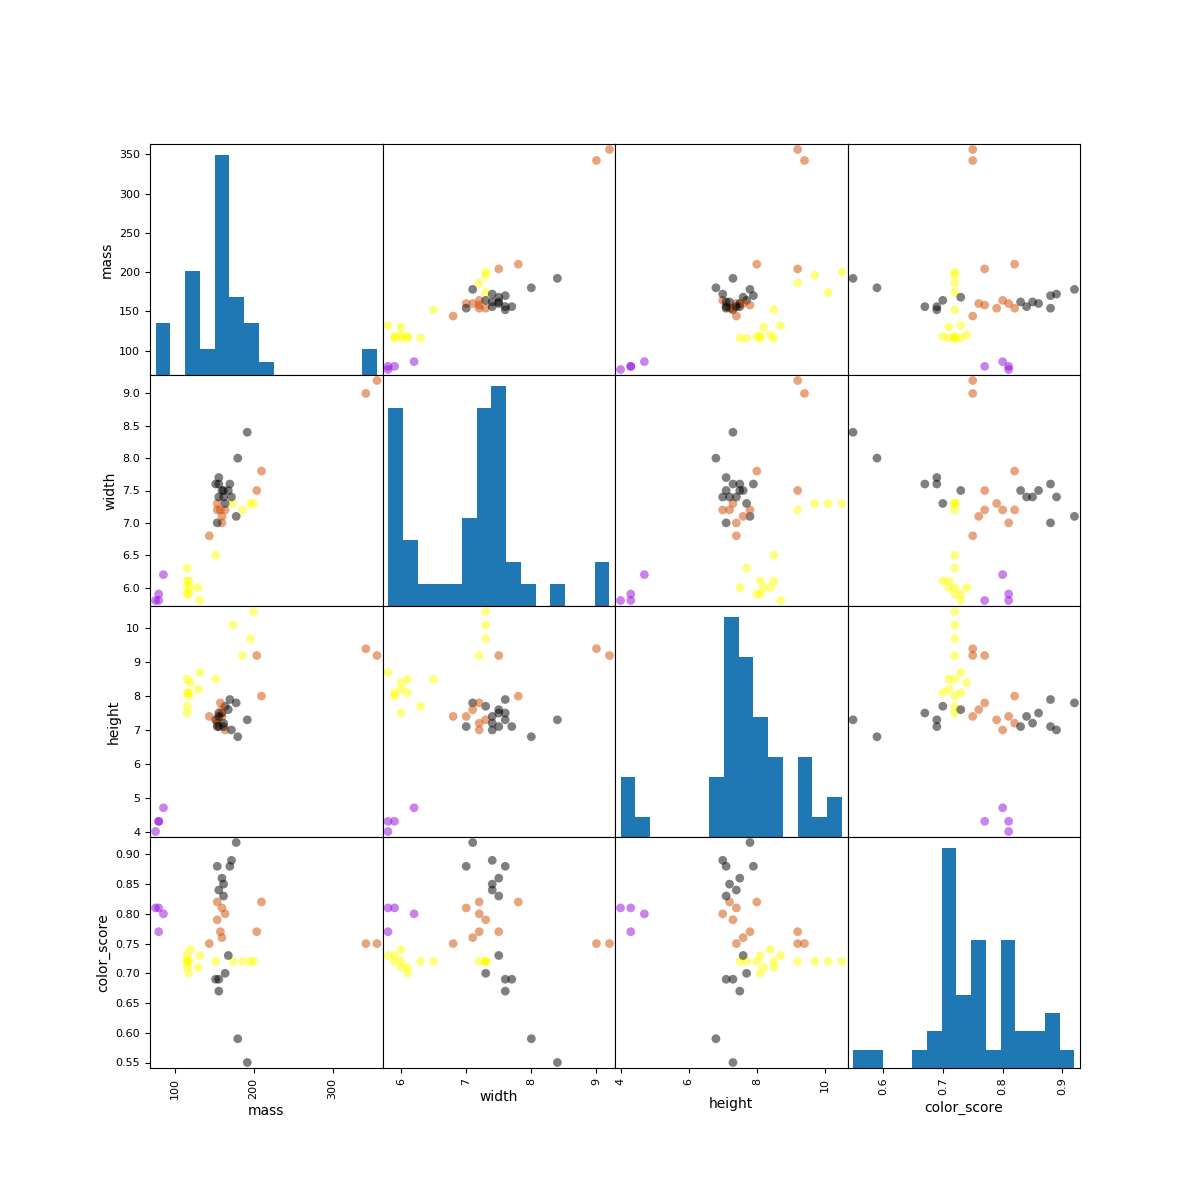

In [8]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train , c=y_train , marker = 'o',s=40, hist_kwds= {'bins':15} , figsize=(12,12), cmap=cmap)

<IPython.core.display.Javascript object>


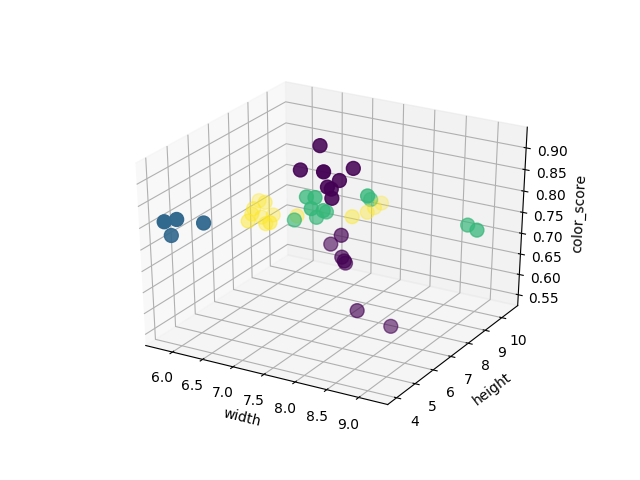

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['width'], X_train['height'],X_train['color_score'], c=y_train ,marker = 'o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
knn.score(X_test,y_test)

0.6

In [13]:
fruit_prediction = knn.predict([[155,6.43,9.5,1]])
fruits_unique[fruit_prediction[0]]


'apple'

In [14]:
print(fruit_prediction[0])

1
